# Retail Sales Analysis

Exploratory data analysis of a 1,000-record retail transactions dataset to uncover purchasing patterns across gender, age groups, and product categories — simulating a real-world business intelligence workflow.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

retail_sales_data = pd.read_csv("retail_sales_dataset.csv", header=0)
retail_sales_data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [2]:
# Turn data into dataframe for transformations
retail_sales_data_df = pd.DataFrame(retail_sales_data)
retail_sales_data_df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


**Check shape, missing values, and describe data.**

In [3]:
#df.info()
#df.describe()
retail_sales_data_df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [4]:
# Check for missing values
retail_sales_data.isnull().sum()

<bound method DataFrame.sum of      Transaction ID   Date  Customer ID  Gender    Age  Product Category  \
0             False  False        False   False  False             False   
1             False  False        False   False  False             False   
2             False  False        False   False  False             False   
3             False  False        False   False  False             False   
4             False  False        False   False  False             False   
..              ...    ...          ...     ...    ...               ...   
995           False  False        False   False  False             False   
996           False  False        False   False  False             False   
997           False  False        False   False  False             False   
998           False  False        False   False  False             False   
999           False  False        False   False  False             False   

     Quantity  Price per Unit  Total Amount  
0       Fa

## Gender-Based Spending By Product Category

To compare total spending across product categories between male and female customers, we use a pivot table. Here we split the pivot table by age groups and product category.

In [5]:
# Let's try and separate customers by age and analyze their shopping habits.
bins = [0, 25, 35, 50, 100]
labels = ["18-25", "26-35", "36-50", "51+"]

retail_sales_data_df["Age Group"] = pd.cut(
    retail_sales_data_df["Age"],
    bins=bins,
    labels=labels
)

Here we use a pivot table to create groups of gender, age group, and product category to better classify the customers and their shopping habits.

In [6]:
pivot_gender_category = pd.pivot_table(
    retail_sales_data_df,
    values="Total Amount",
    index=["Age Group","Product Category"],
    columns="Gender",
    aggfunc="sum",
    observed=False
)

pivot_gender_category

Gender                      Female   Male
Age Group Product Category               
18-25     Beauty             13435  17845
          Clothing           11825  14685
          Electronics        14210  12550
26-35     Beauty             18750  12490
          Clothing           19320  20655
          Electronics        17045  10220
36-50     Beauty             24235  24875
          Clothing           25345  17630
          Electronics        21210  26365
51+       Beauty             18410  13475
          Clothing           24785  21335
          Electronics        24270  31035

## Graph of Gender-Based Spending

<Axes: title={'center': 'Total Spending by Gender and Product Category'}, xlabel='Product Category', ylabel='Total Sales'>

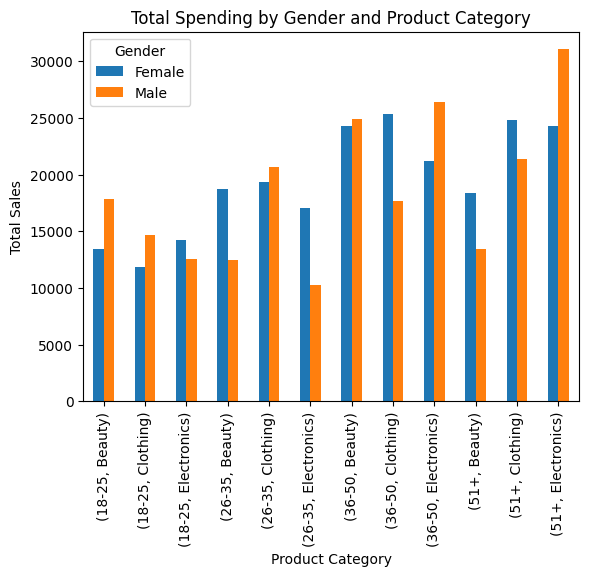

In [8]:
pivot_gender_category.plot(
    kind="bar",
    title="Total Spending by Gender and Product Category",
    ylabel="Total Sales",
    xlabel="Product Category"
)

**Key Insights:**
- Female customers spend more on Clothing and Beauty Products
- Male customers dominate Electronics spending.
- Male customers ages 18-25 spend more on beauty products than females of the same age group.
- Spending patterns vary significantly by age group.


## Monthly Revenue Trend

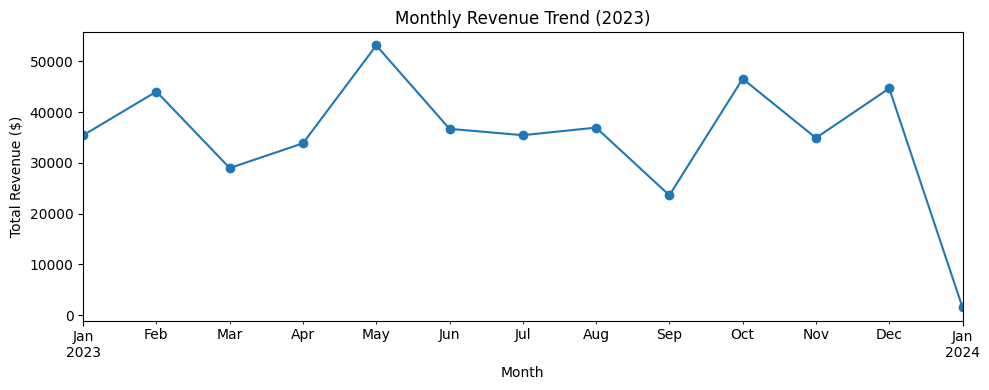

In [7]:
# Convert Date column to datetime and extract month
retail_sales_data_df["Date"] = pd.to_datetime(retail_sales_data_df["Date"])
monthly_revenue = retail_sales_data_df.groupby(
    retail_sales_data_df["Date"].dt.to_period("M")
)["Total Amount"].sum()

# Plot
monthly_revenue.plot(
    kind="line",
    title="Monthly Revenue Trend (2023)",
    ylabel="Total Revenue ($)",
    xlabel="Month",
    marker="o",
    figsize=(10, 4)
)
plt.tight_layout()
plt.show()